In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [57]:
logpath = '/Users/luis/Desktop/Cranmer2024/Workplace/smallMutations/similar-expressions/src/dev/SR_loss_logging/logs'
fpath = os.path.join(logpath, sorted([fname for fname in os.listdir(logpath) if fname.endswith('.csv')])[-1])
print(f'{fpath=}')
df = pd.read_csv(fpath)

df['loss_diff'] = df['loss_after'] - df['loss_before']
df['score_diff'] = df['score_after'] - df['score_before']

df['is_inf'] = np.isinf(df.score_after) | np.isinf(df.loss_after)

print(f'{df.shape=}')

df.head()

fpath='/Users/luis/Desktop/Cranmer2024/Workplace/smallMutations/similar-expressions/src/dev/SR_loss_logging/logs/sr_logs_2025-04-03_15-16-30.csv'
df.shape=(58523, 14)


,timestamp,mutation_type,num_evals,attempts,loss_before,loss_after,score_before,score_after,successful_mutation,mutation_accepted,result_reason,loss_diff,score_diff,is_inf
0,1.743686e+09,do_nothing,0,0,135666.62,135666.62,0.968429,0.968429,True,True,pass,0.00,0.000000,False
1,1.743686e+09,insert_node,1,1,137287.90,141322.47,0.980002,1.008802,True,True,pass,4034.57,0.028800,False
2,1.743686e+09,rotate_tree,1,1,132737.05,136335.56,0.947517,0.973204,True,True,pass,3598.51,0.025687,False
3,1.743686e+09,insert_node,1,1,136161.75,139920.14,0.971963,0.998792,True,True,pass,3758.39,0.026829,False
4,1.743686e+09,do_nothing,0,0,135666.62,135666.62,0.968429,0.968429,True,True,pass,0.00,0.000000,False


In [40]:
# Show results reason by mutation count
# Get counts by mutation type and result reason
counts_df = df.groupby('mutation_type')['result_reason'].value_counts().unstack().fillna(0)

# Add sum of each mutation type
counts_df['sum'] = counts_df.sum(axis=1)

# Calculate ratios
ratio_df = (counts_df.div(counts_df['sum'], axis=0)*100).round(2)

# Display counts and ratios
print("Counts:")
display(counts_df)
print("\nRatios:")
display(ratio_df)

Counts:


result_reason,annealing_or_frequency,failed_constraint_check,pass,sum
mutation_type,,,,
add_node,256.0,0.0,182.0,438.0
delete_node,730.0,0.0,1676.0,2406.0
do_nothing,0.0,0.0,2874.0,2874.0
insert_node,7104.0,2.0,5713.0,12819.0
mutate_constant,37.0,0.0,82.0,119.0
mutate_operator,6126.0,0.0,17671.0,23797.0
neural_mutate_tree,864.0,0.0,5731.0,6595.0
randomize,27.0,0.0,17.0,44.0
rotate_tree,2403.0,0.0,6982.0,9385.0



Ratios:


result_reason,annealing_or_frequency,failed_constraint_check,pass,sum
mutation_type,,,,
add_node,58.45,0.00,41.55,100.0
delete_node,30.34,0.00,69.66,100.0
do_nothing,0.00,0.00,100.00,100.0
insert_node,55.42,0.02,44.57,100.0
mutate_constant,31.09,0.00,68.91,100.0
mutate_operator,25.74,0.00,74.26,100.0
neural_mutate_tree,13.10,0.00,86.90,100.0
randomize,61.36,0.00,38.64,100.0
rotate_tree,25.60,0.00,74.40,100.0


In [66]:
(df[df.is_inf].groupby('mutation_type').size() / df.groupby('mutation_type').size()*100).round(2)

mutation_type
add_node               9.13
delete_node            2.29
do_nothing              NaN
insert_node            5.87
mutate_constant        0.84
mutate_operator        2.34
neural_mutate_tree     0.38
randomize             25.00
rotate_tree            2.22
simplify                NaN
swap_operands          3.12
dtype: float64

In [68]:
df[~df.is_inf].groupby('mutation_type').loss_diff.median()

mutation_type
add_node               31883.5975
delete_node            10071.6170
do_nothing                 0.0000
insert_node            12671.7295
mutate_constant        14838.4375
mutate_operator         7150.4450
neural_mutate_tree         0.0000
randomize             116029.0200
rotate_tree             7626.2100
simplify                   0.0000
swap_operands              0.0000
Name: loss_diff, dtype: float64

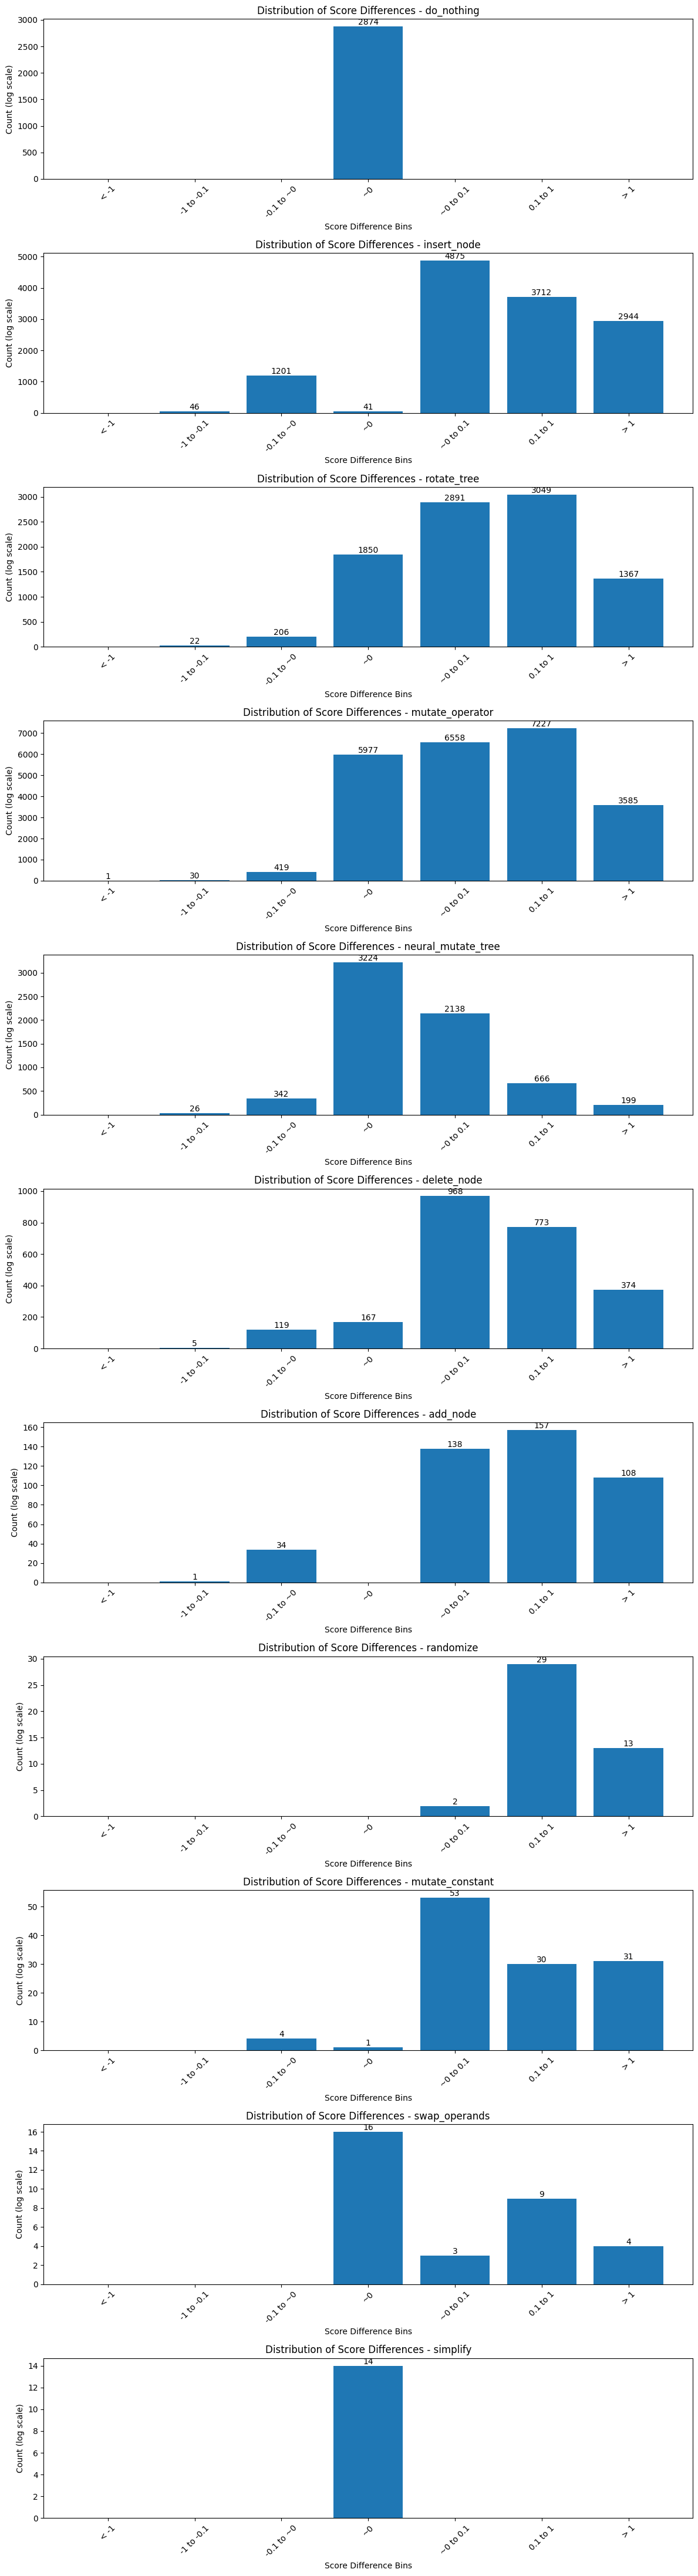

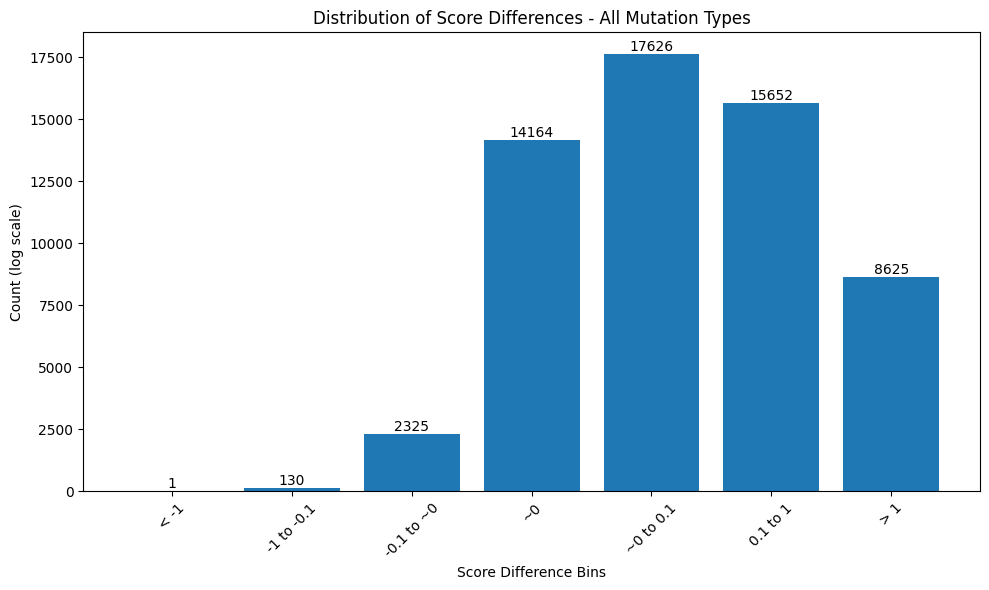

Bin counts by mutation type:

do_nothing:
  < -1: 0
  -1 to -0.1: 0
  -0.1 to ~0: 0
  ~0: 2874
  ~0 to 0.1: 0
  0.1 to 1: 0
  > 1: 0

insert_node:
  < -1: 0
  -1 to -0.1: 46
  -0.1 to ~0: 1201
  ~0: 41
  ~0 to 0.1: 4875
  0.1 to 1: 3712
  > 1: 2944

rotate_tree:
  < -1: 0
  -1 to -0.1: 22
  -0.1 to ~0: 206
  ~0: 1850
  ~0 to 0.1: 2891
  0.1 to 1: 3049
  > 1: 1367

mutate_operator:
  < -1: 1
  -1 to -0.1: 30
  -0.1 to ~0: 419
  ~0: 5977
  ~0 to 0.1: 6558
  0.1 to 1: 7227
  > 1: 3585

neural_mutate_tree:
  < -1: 0
  -1 to -0.1: 26
  -0.1 to ~0: 342
  ~0: 3224
  ~0 to 0.1: 2138
  0.1 to 1: 666
  > 1: 199

delete_node:
  < -1: 0
  -1 to -0.1: 5
  -0.1 to ~0: 119
  ~0: 167
  ~0 to 0.1: 968
  0.1 to 1: 773
  > 1: 374

add_node:
  < -1: 0
  -1 to -0.1: 1
  -0.1 to ~0: 34
  ~0: 0
  ~0 to 0.1: 138
  0.1 to 1: 157
  > 1: 108

randomize:
  < -1: 0
  -1 to -0.1: 0
  -0.1 to ~0: 0
  ~0: 0
  ~0 to 0.1: 2
  0.1 to 1: 29
  > 1: 13

mutate_constant:
  < -1: 0
  -1 to -0.1: 0
  -0.1 to ~0: 4
  ~0: 1
  ~

In [ ]:
# Create histogram with custom bin boundaries for score differences
col = 'score_diff'

# Define custom bin boundaries with specific thresholds
bins = [-np.inf, -1, -0.1, -1e-12, 1e-12, 0.1, 1, np.inf]
bin_labels = ['< -1', '-1 to -0.1', '-0.1 to ~0', '~0', '~0 to 0.1', '0.1 to 1', '> 1']

# Create a figure with subplots for each mutation type
mutation_types = df['mutation_type'].unique()
n_mutations = len(mutation_types)
fig, axes = plt.subplots(nrows=n_mutations, figsize=(12, 4*n_mutations))

# For each mutation type, create a histogram
for i, mutation_type in enumerate(mutation_types):
    # Filter data for this mutation type
    mutation_df = df[df['mutation_type'] == mutation_type]
    
    # Count values in each bin
    hist, _ = np.histogram(mutation_df[col], bins=bins)
    
    # Plot the histogram
    ax = axes[i]
    ax.bar(range(len(hist)), hist, tick_label=bin_labels)
    plt.ylabel('Count')
    ax.set_title(f'{mutation_type}')
    ax.tick_params(axis='x', rotation=45)
    
    # Add bin counts as text on the plot
    for j, count in enumerate(hist):
        if count > 0:  # Only show non-zero counts
            ax.text(j, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Also create an overall histogram for all mutation types combined
plt.figure(figsize=(10, 6))
hist, _ = np.histogram(df[col], bins=bins)
plt.bar(range(len(hist)), hist, tick_label=bin_labels)
plt.ylabel('Count')
plt.title('Distribution of Score Differences - All Mutation Types')
plt.xticks(rotation=45)

# Add bin counts as text
for j, count in enumerate(hist):
    if count > 0:
        plt.text(j, count, str(count), ha='center', va='bottom')
        
plt.tight_layout()
plt.show()

# Print the bin counts for each mutation type
print("Bin counts by mutation type:")
for mutation_type in mutation_types:
    mutation_df = df[df['mutation_type'] == mutation_type]
    hist, _ = np.histogram(mutation_df[col], bins=bins)
    print(f"\n{mutation_type}:")
    for label, count in zip(bin_labels, hist):
        print(f"  {label}: {count}")


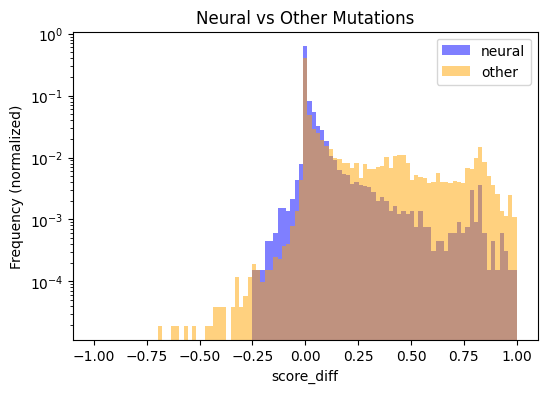

In [86]:
a, n = 1, 100
col = 'score_diff'

# Compare neural_mutate_tree with other mutation types
neural_df = df[df.mutation_type == 'neural_mutate_tree']
other_df = df[df.mutation_type != 'neural_mutate_tree']

# Get counts for normalization
neural_count = len(neural_df)
other_count = len(other_df)

# Plot score differences normalized by count
plt.figure(figsize=(6, 4))
bins = np.linspace(-a, a, n)
plt.hist(neural_df[col], bins=bins, alpha=0.5, label='neural', color='blue', 
         weights=np.ones(neural_count)/neural_count)
plt.hist(other_df[col], bins=bins, alpha=0.5, label='other', color='orange', 
         weights=np.ones(other_count)/other_count)
plt.yscale('log')
plt.legend()
plt.xlabel(col)
plt.ylabel('Frequency (normalized)')
plt.title('Neural vs Other Mutations')
plt.show()

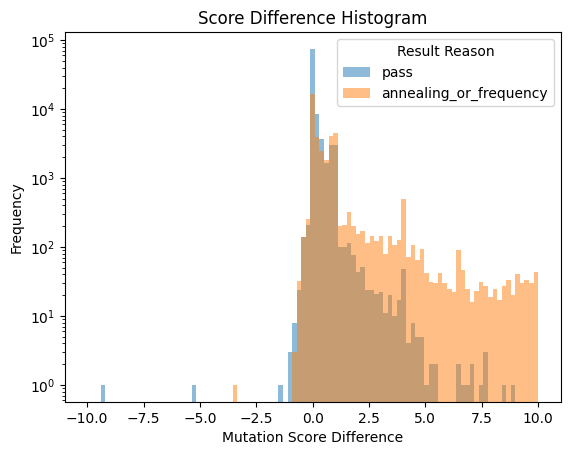

In [20]:
col = 'score_diff'
a, n = 10, 100
bins = np.linspace(-a, a, n)

plt.hist(df[df.result_reason == 'pass'][col], bins=bins, alpha=0.5, label='pass')
plt.hist(df[df.result_reason == 'annealing_or_frequency'][col], bins=bins, alpha=0.5, label='annealing_or_frequency')
plt.legend(title='Result Reason')
plt.yscale('log')
plt.xlabel('Mutation Score Difference')
plt.ylabel('Frequency')
plt.title('Score Difference Histogram')
plt.show()

pass

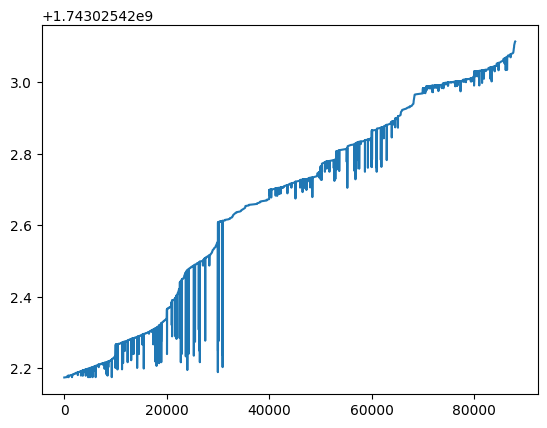

In [160]:
plt.plot(df.timestamp)

(0.0, 2.0)

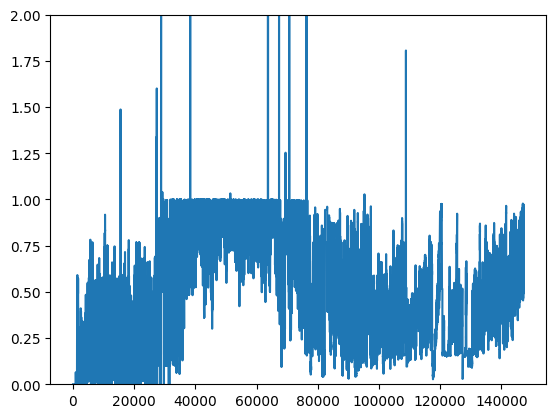

In [177]:
plt.plot(df[['timestamp', 'score_before']].sort_values(by='timestamp', ascending=False).reset_index(drop=True)['score_before'].rolling(window=10).mean())  # .sort_values(ascending=False).reset_index(drop=True)
plt.ylim(0, 2)
# plt.yscale('log')